In [40]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import linprog
import scipy.optimize as opt
%matplotlib inline

In [57]:
def print_discrete_prob_distribution(p, color="blue"):
    plt.bar(range(l), p, 1, color=color, alpha=1)
    plt.ylim(0, 0.5)
    plt.show()

In [32]:
l = 10

mu = np.array([0, 0, 0, 0, 4, 5, 8, 10, 13, 10])
nu = np.array([14, 15, 16, 10, 4, 1, 0, 0, 0, 0])
mu = mu / np.sum(mu)
nu = nu / np.sum(nu)

### Visualize probability distributions $\mu$ and $\nu$

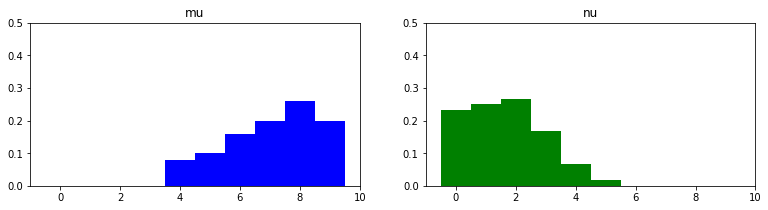

In [70]:
#print("mu:")
#print_discrete_prob_distribution(mu, color="blue")

#print("nu:")
#print_discrete_prob_distribution(nu, color="green")

fig = plt.figure(figsize=(13,3))
axes = fig.subplots(1, 2)
axes[0].bar(range(l), mu, 1, color="blue", alpha=1)
axes[0].set_ylim(0, 0.5)
axes[0].set_title("mu")
axes[1].bar(range(l), nu, 1, color="green", alpha=1)
axes[1].set_ylim(0, 0.5)
axes[1].set_title("nu")
plt.savefig('problem1_mu_nu.png', dpi=300)

### Euclidean barycenter between $\mu$ and $\nu$

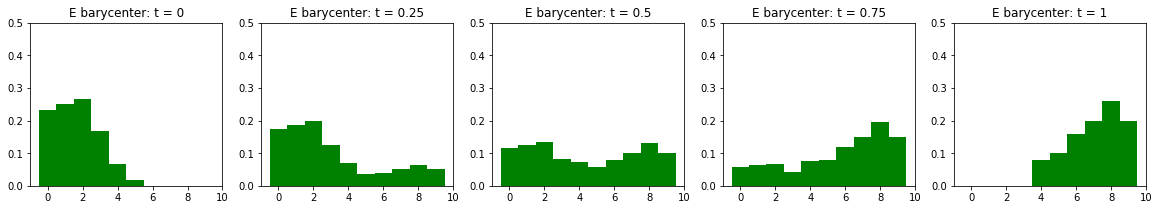

In [71]:
ts = [0, 0.25, 0.5, 0.75, 1]

fig = plt.figure(figsize=(20,3))
axes = fig.subplots(1, 5)
for i, t in enumerate(ts):
    #print_discrete_prob_distribution(t * mu + (1-t) * nu, color="green", axes[0, i])
    #print("barycenter: t=" + str(t))
    axes[i].bar(range(l), t * mu + (1-t) * nu, 1, color="green", alpha=1)
    axes[i].set_ylim(0, 0.5)
    axes[i].set_title("E barycenter: t = {}".format(t))
plt.savefig('problem1_e_barycenter.png', dpi=300)
plt.show()

### Compute Wasserstein barycenter between $\mu$ and $\nu$

In [37]:
C = [[0 for _ in range(l)] for _ in range(l)]

for i in range(l):
    for j in range(l):
        C[i][j] = abs(range(l)[i] - range(l)[j])**2

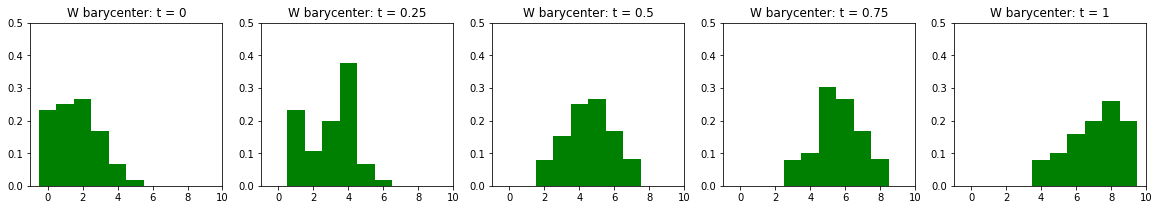

In [72]:
ts = [0, 0.25, 0.5, 0.75, 1]
flatten = lambda l: [item for sublist in l for item in sublist]

fig = plt.figure(figsize=(20,3))
axes = fig.subplots(1, 5)

for i, t in enumerate(ts):
    # TODO:
    # Construct matrix c as: [[  t*c  ]
    #                         [(1-t)*c]
    #                         [   0   ]]
    c = np.array(C).reshape((l**2))
    c = np.hstack((np.multiply(t, c), np.multiply(1-t, c), [0]*l))
    """
    # TODO: 
    # Construct matrices of ones, A_r and A_t, which when multiplied by P reshaped to lxl vector 
    # gives us the equality contraints. Where row i of A_r equals sum of entries of P_i 
    # and row i of A_t equals sum of entries of row i of (P^T). 
    A_r = np.zeros((l, l, l))
    A_t = np.zeros((l, l, l))

    # TODO:
    # Construct matrix A of form: [[A_t, 0, 0]
    #                              [0, A_t, 0]
    #                              [A_r, 0,-I]
    #                              [0, A_r,-I]]
    A_eye = np.eye(l)
    A_zero_1 = np.zeros((A_eye.shape))
    A_zero_2 = np.zeros((l, l**2))
    A = np.zeros((l*4, 2*l**2 + 1))
    """
    # Construct A and b using the 4 constraints
    # 1) P' 1_n - x = 0n
    A_1_P_template = flatten([[1]*l, [0]*l*(l-1)])
    A_1_x_template = flatten([[-1]*1, [0]*(l-1)])
    A_1 = np.array([flatten([np.roll(A_1_P_template, l*n), np.zeros(l**2), np.roll(A_1_x_template, n)]) \
           for n in range(l)])
    #print(A_1)
    
    # 2) P'' 1_n - x = 0
    A_2 = np.array([flatten([np.zeros(l**2), np.roll(A_1_P_template, l*n), np.roll(A_1_x_template, n)]) \
           for n in range(l)])
    #print(A_2)
    
    # 3) P'^T 1_n = mu
    col_template = np.array(flatten([[1], [0]*(l-1)]))
    A_3 = np.array([np.append(np.tile(np.roll(col_template, x), l), np.tile([0],l**2+l)) for x in range(l)])
    #print(A_3)
    
    # 4) P''^T 1_n = nu
    A_4 = np.array([np.append(np.tile([0], l**2), np.append(np.tile(np.roll(col_template, x), l), np.tile([0], l))) for x in range(l)])
    #print(A_4)
    
    A = np.vstack((A_1, A_2, A_3, A_4))
    b = np.append(np.append(np.tile([0], 2*l), mu), nu)
    #print(b)
    x = opt.linprog(c, A_eq=A, b_eq=b)
    #print(x)
    P_1 = x.x[:l**2]
    P_2 = x.x[l**2:2*l**2]
    a = x.x[2*l**2:]
    
    axes[i].bar(range(l), a, 1, color="green", alpha=1)
    axes[i].set_ylim(0, 0.5)
    axes[i].set_title("W barycenter: t = {}".format(t))

    #print_discrete_prob_distribution(a, color="green")
    """
    # Construct vector b as: [mu, nu, 0, 0].T
    b_zero = np.zeros(nu.shape)
    b = np.concatenate((mu, nu, b_zero, b_zero), axis=0)

    # TODO:
    # Solve LP with objective c^Tx, constraints Ax = b
    x = np.zeros((2*l**2 + l,))
  
    # Our resulting x = [P_1, P_2, a].T
    P_1 = x[:l**2]
    P_2 = x[l**2:2*l**2]
    a = x[2*l**2:]
    
    print("barycenter: t=" + str(t))
    """
plt.savefig('problem1_w_barycenter.png', dpi=300)
plt.show()